# Chapter 2. Analyzing Subgroups

# 2.1 Slicing and Dicing Data

In the previous chapter, we looked at ways to summarize and visualize _all_ the values of a variable, like age. But what if we only wanted to know the age distribution of just the male passengers on the Titanic? To answer such questions, we have to **slice** our data. That is, we have to filter the `DataFrame` to include only those rows where a variable (e.g., `sex`) is equal to a particular value (e.g., `"male"`). 

The term _slicing_ makes sense if you imagine the data as a cube, with a different variable along each dimension. Slicing this cube along any one dimension will return a subset of the original data, corresponding to a particular value of that variable.

<img src="slice1.gif" width="300"> <img src="slice2.gif" width="300"> ([source](http://www.hypertextbookshop.com/dataminingbook/public_version/contents/chapters/chapter003/section004/blue/page004.html))

**Documentation**

* iPython magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html

* Series.isin(): https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html


In [1]:
%matplotlib inline

import pandas as pd
pd.options.display.max_rows = 5
df = pd.read_csv("../data/titanic.csv")
df

pclass  survived                            name     sex      age  \
0          1         1   Allen, Miss. Elisabeth Walton  female  29.0000   
1          1         1  Allison, Master. Hudson Trevor    male   0.9167   
...      ...       ...                             ...     ...      ...   
1307       3         0             Zakarian, Mr. Ortin    male  27.0000   
1308       3         0              Zimmerman, Mr. Leo    male  29.0000   

      sibsp  parch  ticket      fare    cabin embarked boat  body  \
0         0      0   24160  211.3375       B5        S    2   NaN   
1         1      2  113781  151.5500  C22 C26        S   11   NaN   
...     ...    ...     ...       ...      ...      ...  ...   ...   
1307      0      0    2670    7.2250      NaN        C  NaN   NaN   
1308      0      0  315082    7.8750      NaN        S  NaN   NaN   

                            home.dest  
0                        St Louis, MO  
1     Montreal, PQ / Chesterville, ON  
...                               ...  
1307                              NaN  
1308                              NaN  

[1309 rows x 14 columns]

## Two Ways to Slice a DataFrame

One way to slice a `pandas` `DataFrame` is to set the slicing variable as the index and then to select the value you want using `.loc`.

So for example, if we wanted a `DataFrame` with just the male passengers, we could do:

In [3]:
df.set_index("sex").loc["male"]

pclass  survived                                  name      age  sibsp  \
sex                                                                            
male       1         1        Allison, Master. Hudson Trevor   0.9167      1   
male       1         0  Allison, Mr. Hudson Joshua Creighton  30.0000      1   
...      ...       ...                                   ...      ...    ...   
male       3         0                   Zakarian, Mr. Ortin  27.0000      0   
male       3         0                    Zimmerman, Mr. Leo  29.0000      0   

      parch  ticket     fare    cabin embarked boat   body  \
sex                                                          
male      2  113781  151.550  C22 C26        S   11    NaN   
male      2  113781  151.550  C22 C26        S  NaN  135.0   
...     ...     ...      ...      ...      ...  ...    ...   
male      0    2670    7.225      NaN        C  NaN    NaN   
male      0  315082    7.875      NaN        S  NaN    NaN   

                            home.dest  
sex                                    
male  Montreal, PQ / Chesterville, ON  
male  Montreal, PQ / Chesterville, ON  
...                               ...  
male                              NaN  
male                              NaN  

[843 rows x 13 columns]

In [4]:
males = df.set_index("sex").loc["male"]
males

pclass  survived                                  name      age  sibsp  \
sex                                                                            
male       1         1        Allison, Master. Hudson Trevor   0.9167      1   
male       1         0  Allison, Mr. Hudson Joshua Creighton  30.0000      1   
...      ...       ...                                   ...      ...    ...   
male       3         0                   Zakarian, Mr. Ortin  27.0000      0   
male       3         0                    Zimmerman, Mr. Leo  29.0000      0   

      parch  ticket     fare    cabin embarked boat   body  \
sex                                                          
male      2  113781  151.550  C22 C26        S   11    NaN   
male      2  113781  151.550  C22 C26        S  NaN  135.0   
...     ...     ...      ...      ...      ...  ...    ...   
male      0    2670    7.225      NaN        C  NaN    NaN   
male      0  315082    7.875      NaN        S  NaN    NaN   

                            home.dest  
sex                                    
male  Montreal, PQ / Chesterville, ON  
male  Montreal, PQ / Chesterville, ON  
...                               ...  
male                              NaN  
male                              NaN  

[843 rows x 13 columns]

<AxesSubplot:ylabel='Frequency'>

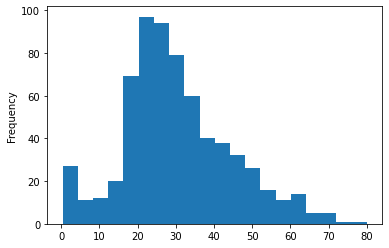

In [5]:
males.age.plot.hist(bins=20)

Another way to slice a `DataFrame` is to use a **boolean mask**. A boolean mask is simply a boolean `Series` whose index matches the index of the `DataFrame`.

To create a boolean mask, we can use the standard comparison operators `==`, `<`, `>`, and `!=` on any column in the `DataFrame`. For example, the following code produces a boolean mask that is equal to `True` for the male passengers and equal to False otherwise.

In [6]:
df.sex == "male"

0       False
1        True
        ...  
1307     True
1308     True
Name: sex, Length: 1309, dtype: bool

Notice how the equality operator was automatically _broadcast_ over the elements of the `Series` `df.sex`. That is, we check whether each element of `df.sex` is equal to `"male"`, resulting in a `Series` of booleans.

This boolean mask can then be passed into a `DataFrame` to obtain just the subset of rows where the mask equals `True`.

In [7]:
df[df.sex == "male"]

pclass  survived                                  name   sex      age  \
1          1         1        Allison, Master. Hudson Trevor  male   0.9167   
3          1         0  Allison, Mr. Hudson Joshua Creighton  male  30.0000   
...      ...       ...                                   ...   ...      ...   
1307       3         0                   Zakarian, Mr. Ortin  male  27.0000   
1308       3         0                    Zimmerman, Mr. Leo  male  29.0000   

      sibsp  parch  ticket     fare    cabin embarked boat   body  \
1         1      2  113781  151.550  C22 C26        S   11    NaN   
3         1      2  113781  151.550  C22 C26        S  NaN  135.0   
...     ...    ...     ...      ...      ...      ...  ...    ...   
1307      0      0    2670    7.225      NaN        C  NaN    NaN   
1308      0      0  315082    7.875      NaN        S  NaN    NaN   

                            home.dest  
1     Montreal, PQ / Chesterville, ON  
3     Montreal, PQ / Chesterville, ON  
...                               ...  
1307                              NaN  
1308                              NaN  

[843 rows x 14 columns]

Notice how the index is missing the numbers 0 and 2 because those passengers were female. We are left with a `DataFrame` where the variable `sex` only takes on one value, `"male"`.

Now we can select the age column from this `DataFrame` and plot the distribution, as we did before.

<AxesSubplot:ylabel='Frequency'>

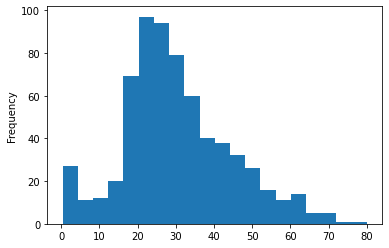

In [9]:
df[df.sex == "male"].age.plot.hist(bins=20)

A boolean mask is a kind of selector, but it is quite different from the label-based (`.loc`) and position-based (`.iloc`) selection that we encountered before. Passing a boolean mask to `.loc` is equivalent to passing the boolean mask directly to the `DataFrame`:

In [9]:
df.loc[df.sex == "male"]

pclass  survived                                  name   sex      age  \
1          1         1        Allison, Master. Hudson Trevor  male   0.9167   
3          1         0  Allison, Mr. Hudson Joshua Creighton  male  30.0000   
...      ...       ...                                   ...   ...      ...   
1307       3         0                   Zakarian, Mr. Ortin  male  27.0000   
1308       3         0                    Zimmerman, Mr. Leo  male  29.0000   

      sibsp  parch  ticket     fare    cabin embarked boat   body  \
1         1      2  113781  151.550  C22 C26        S   11    NaN   
3         1      2  113781  151.550  C22 C26        S  NaN  135.0   
...     ...    ...     ...      ...      ...      ...  ...    ...   
1307      0      0    2670    7.225      NaN        C  NaN    NaN   
1308      0      0  315082    7.875      NaN        S  NaN    NaN   

                            home.dest  
1     Montreal, PQ / Chesterville, ON  
3     Montreal, PQ / Chesterville, ON  
...                               ...  
1307                              NaN  
1308                              NaN  

[843 rows x 14 columns]

We might prefer to pass the boolean mask to `.loc` if we also wanted to select columns at the same time. For example, if we wanted to select the ages of the male passengers, we would do:

In [18]:
df.loc[df.sex == "male",  ["fare","pclass" ]]

fare  pclass
1     151.550       1
3     151.550       1
...       ...     ...
1307    7.225       3
1308    7.875       3

[843 rows x 2 columns]

### Speed Comparison

We've seen two ways to slice a `DataFrame`. Which way is better?

One consideration is that the first method forces you to set the index of your `DataFrame` to the variable you want to slice by. If your `DataFrame` already has a natural index, you might not want to replace that index just to slice the data.

Another consideration is speed. Let's test the runtimes of the two options by using the `%timeit` magic. (**Warning:** The cell below will take a while to run, since `timeit` will run each command multiple times and then report the mean and standard deviation of the runtimes.)

In [19]:
%timeit df.set_index("sex").loc["male"].age.mean()


645 µs ± 2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%timeit df[df.sex == "male"].age.mean()

385 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
%%timeit

### this times the contents of the entire cell

tmp = df[df.sex == "male"].age.mean()



386 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


So boolean masking is also significantly faster than re-indexing and selecting. Taking all considerations into account, boolean masking is generally the best way to slice your data.

### Working with Boolean Series

Remember that a boolean mask is a `Series` of booleans. A boolean `Series` can be regarded as a categorical variable, but it can also be treated as a quantitative variable, where the `True`s are 1s and the `False`s are 0s. For example, the following command actually produces a `Series` of 7s and 8s.

In [26]:
(df.sex == "male")

843

For a more realistic example of how we might use a boolean `Series` as a quantitative variable, recall how we coded binary categorical variables as 0s and 1s. This allowed us to use functions like `.sum()` and `.mean()`, that are for quantitative variables, to learn about the categorical variable, such as the _number_ of observations in category 1 and the _proportion_ of observations in category 1. (Remember that a _proportion_ is just a percentage, expressed as a number between 0 and 1.)

Boolean `Series` are also variables containing just 0s and 1s, where a 1 represents `True`. So the command

In [29]:
(df.sex == "male").sum(), (df.sex == "male").count()

(843, 1309)

returns the _number_ of observations where `sex == "male"` and

In [30]:
(df.sex == "male").mean()

0.6440030557677616

returns the _proportion_ of observations where `sex == "male"`. Check that these answers are correct by some other method.

Notice, that the `count()` aggregate here behavess differently

In [31]:
(df.sex == "male").count()

1309

## Dicing

<img src="dice.jpeg">

Dicing is a generalization of slicing. With slicing, we select a single value of a single variable. With dicing, we are allowed to select multiple values of multiple variables. Dicing allows us to answer questions like, "What was the age distribution of male _survivors_ on the Titanic?" To answer this question, we have to filter our data set on two variables, `sex` and `survived`.

We can dice a `pandas` `DataFrame` using a boolean mask, as before. The only difference is in how we obtain that boolean mask. We want a boolean mask that is `True` if `sex` is `"male"` _and_ `survived` is `1`. Let's start by creating a separate boolean mask for each of these variables.

In [32]:
df.sex == "male"

0       False
1        True
        ...  
1307     True
1308     True
Name: sex, Length: 1309, dtype: bool

In [33]:
df.survived == 1

0        True
1        True
        ...  
1307    False
1308    False
Name: survived, Length: 1309, dtype: bool

We want to combine these two boolean masks into a single mask that is `True` only if the corresponding elements of _both_ masks are `True`. This can be accomplished by joining the two `Series` by the logical operator `&`.

In [35]:
(df.sex == "male") & (df.survived == 1)

0       False
1        True
        ...  
1307    False
1308    False
Length: 1309, dtype: bool

Verify for yourself that the `True` values in this `Series` correspond to observations where _both_ masks were True.

_Warning:_ Notice how we included parentheses around each boolean mask above. These parentheses turn out to be necessary because of Python's operator precedence. The command

`df.sex == "male" & df.survived == 1`

will be interpreted by Python as 

`df.sex == ("male" & df.survived) == 1`

and result in an error. Python does not know how to evaluate `("male" & df.survived)`, since the logical operator `&` is not defined for a string and a `Series`. Parentheses ensure that Python evaluates the boolean masks first and then the logical operator:

`(df.sex == "male") & (df.survived == 1)`.

Forgetting the parentheses around boolean masks is a common error. To make matters worse, the error message that you get is not very helpful for diagnosing the problem. If you don't believe me, just try running the offending command above!

Now that we have the correct boolean mask for the dicing operation, we can plot the age distribution of the male survivors.

In [36]:
df[(df.sex == "male") & (df.survived == 1)]

pclass  survived                            name   sex      age  sibsp  \
1          1         1  Allison, Master. Hudson Trevor  male   0.9167      1   
5          1         1             Anderson, Mr. Harry  male  48.0000      0   
...      ...       ...                             ...   ...      ...    ...   
1256       3         1  Touma, Master. Georges Youssef  male   7.0000      1   
1277       3         1            Vartanian, Mr. David  male  22.0000      0   

      parch  ticket      fare    cabin embarked   boat  body  \
1         2  113781  151.5500  C22 C26        S     11   NaN   
5         0   19952   26.5500      E12        S      3   NaN   
...     ...     ...       ...      ...      ...    ...   ...   
1256      1    2650   15.2458      NaN        C      C   NaN   
1277      0    2658    7.2250      NaN        C  13 15   NaN   

                            home.dest  
1     Montreal, PQ / Chesterville, ON  
5                        New York, NY  
...                               ...  
1256                              NaN  
1277                              NaN  

[161 rows x 14 columns]

<AxesSubplot:ylabel='Frequency'>

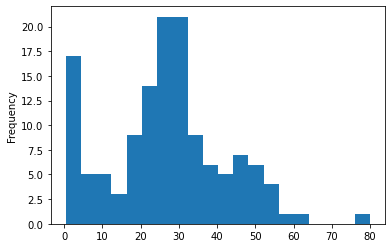

In [38]:
df[(df.sex == "male") & (df.survived == 1)].age.plot.hist(bins=20)

Notice the peak between 0 and 10. A disproportionate number of young children survived because they were given priority.

So far, we have worked exclusively with the `&` operator. But there are actually three logical operators that can be used to modify and combine boolean masks:

- `&` means "and"
- `|` means "or"
- `~` means "not"

Like `&`, `|` and `~` operate elementwise on boolean `Series`. Examples are provided below.

<AxesSubplot:ylabel='Frequency'>

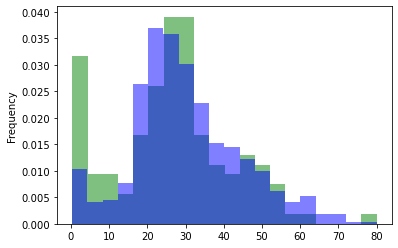

In [48]:
df[(df.sex == "male") & (df.survived == 1)].age.plot.hist(bins=20, alpha = 0.5, color = 'green', density =True)
df[(df.sex == "male")].age.plot.hist(bins=20, alpha=0.5, color = 'blue', density=True)


In [41]:
# male OR survived
(df.sex == "male") | (df.survived == 1)

0       True
1       True
        ... 
1307    True
1308    True
Length: 1309, dtype: bool

In [42]:
# equivalent to (df.sex != "male")
~(df.sex == "male")

0        True
1       False
        ...  
1307    False
1308    False
Name: sex, Length: 1309, dtype: bool

Notice how we use parentheses to ensure that the boolean mask is evaluated before the logical operators.

# Exercises

Exercises 1-3 deal with the Titanic data set.

**Exercise 1.** Is there any advantage to selecting the column at the same time you apply the boolean mask? In other words, is the second option below any faster than the first?

1. `df[df.sex == "female"].age`
2. `df.loc[df.sex == "female", "age"]`

Use the `%timeit` magic to compare the runtimes of these two options.

In [ ]:
# YOUR CODE HERE

**Exercise 2.** Make a single graphic that compares the age distribution of the males who survived with the age distribution of the males who did not.

In [ ]:
# YOUR CODE HERE

**Exercise 3.** What percentage of 1st class passengers survived? What percentage of 3rd class passengers survived?

In [ ]:
# YOUR CODE HERE

Exercises 4-7 work with the Tips data set (`/data301/data/tips.csv`). The following code reads the data into a `DataFrame` called `tips` and creates a new column called `tip_percent` out of the `tip` and `total_bill` columns. This new column represents the tip as a percentage of the total bill (as a number between 0 and 1).

In [13]:
tips = pd.read_csv("../data/tips.csv")
tips["tip_percent"] = tips.tip / tips.total_bill
tips

total_bill   tip     sex smoker   day    time  size  tip_percent
0         16.99  1.01  Female     No   Sun  Dinner     2     0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3     0.160542
..          ...   ...     ...    ...   ...     ...   ...          ...
242       17.82  1.75    Male     No   Sat  Dinner     2     0.098204
243       18.78  3.00  Female     No  Thur  Dinner     2     0.159744

[244 rows x 8 columns]

**Exercise 4.** Calculate the average tip percentage paid by parties of 4 or more.

In [ ]:
# YOUR CODE HERE

**Exercise 5.** Make a visualization comparing the distribution of tip percentages left by males and females. How do they compare?

In [ ]:
# YOUR CODE HERE

**Exercise 6.** What is the average table size on weekdays? (_Hint:_ There are at least two ways to create the appropriate boolean mask: using the `|` logical operator and using the `.isin()` method. See if you can do it both ways.)

In [ ]:
# YOUR CODE HERE

**Exercise 7.** Calculate the average table size for each day of the week. On which day of the week does the waiter serve the largest parties, on average?

In [ ]:
# YOUR CODE HERE

**Submission Instructions**

Submit using the following command:

            handin dekhtyar 301-lab05